<a href="https://colab.research.google.com/github/Guliko24/CE807_Text_Analytics/blob/main/Assignment/Text_analytics_code_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student ID: 2323017

**You student_id is your 7/8 digit faser number.**

This is a sample format for CE807: Assignment . You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes
4.   Other Method/model Codes, if any

**You must have `train_unsup`, `test_unsup` for Unsupervised method  and `train_dis`, `test_dis` for Discriminatuve method to perform full training and testing. This will be evaluated automatically, without this your code will fail and no marked.**

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices.

Before each `code block/function`, you must have a `text block` which explain what code block/function is going to do. For each function/class, you need to properly document what are it's input, functionality and output.

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`.

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**.
*   read dataset from './data/number/', where number is last digit of your student_id folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './model/student_id/Model_Unsup/' and './model/student_id/Model_Dis/' for Unsupervised and Discriminative model respectively.
*   at testing time you will load models from './model/student_id/Model_Unsup/' and './model/student_id/Model_Dis/'  for Unsupervised and Discriminative model respectively. Your output file based on the test file will be named “test.csv” and you will add/modify “out_label_model_unsup” and “out_label_model_dis” column in the existing columns from test.csv. These outputs will be generated from your trained models.
*  after testing, your output file will be named “test.csv” and you will add/modify “out_label_model_unsup” and “out_label_model_Dis” column in the existing columns from test.csv. These outputs will be generated from your trained models.




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

In [1]:
!pip install transformers

Let's import all require libraries.
For example, `numpy`

In [2]:
import numpy as np
import os
import pickle
import pandas as pd

**Let's put your student id as a variable, that you will use different places**

In [3]:
student_id = 2323017 # this is my student ID corresponding to hmamay

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [4]:
# set same seeds for all libraries
#numpy seed
np.random.seed(student_id)

train_unsup()
test_unsup()
train_dis()
test_dis()

# Common Codes

In this section you will write all common codes, for examples


*   Data read
*   Command Line argument reading
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

For examples,

student_id = 12345670

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807-24-SP/Assignment/’ in your GDrive

now set all global variable,


Sample output directory and file structure: https://drive.google.com/drive/folders/1ZCVOBjsxu3bnXRk8tUVkL97Bm1MmS_gE?usp=sharing   

In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
# Add your code to initialize GDrive and data and models paths

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '/content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017'
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['data', 'model', '.ipynb_checkpoints', '__pycache__', 'sentiment_analysis.py', 'output_test.csv', 'Text_analytics_code.ipynb']


In [7]:
# Set up model paths
MODEL_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'model')
MODEL_Dis_DIRECTORY = os.path.join(MODEL_PATH, 'model_dis')  # Model Discriminative directory
MODEL_Unsup_DIRECTORY = os.path.join(MODEL_PATH, 'model_unsup')  # Model Unsupervised directory
print('Model Discriminative directory: ', MODEL_Dis_DIRECTORY)
print('Model Unsupervised directory: ', MODEL_Unsup_DIRECTORY)

Model Discriminative directory:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis
Model Unsupervised directory:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_unsup


In [8]:
DATA_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'data', '37') # 37 is a dataset allocated to my StudetnID
train_file = os.path.join(DATA_PATH, 'train.csv')
print('Train file: ', train_file)

val_file = os.path.join(DATA_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(DATA_PATH, 'test.csv')
print('Test file: ', test_file)

Train file:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/data/37/train.csv
Validation file:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/data/37/valid.csv
Test file:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/data/37/test.csv


In [16]:
# Read train Data
train_df = pd.read_csv(train_file)
train_df.head()

,sentiment,text
0,positive,Works great
1,negative,I drive an SUV and these do not fit on my back...
2,positive,It does what is supposed to be.
3,positive,I use this on my 2006 bmw m5. works like a ch...
4,positive,…wasn’t what I thought it could do… thinking t...


In [17]:
# Read Validation Data
val_df = pd.read_csv(val_file)
val_df.head()
val_df.shape

(454, 2)

In [18]:
# Read Test Data
test_df = pd.read_csv(test_file)
test_df.head()
test_df.shape

(409, 3)

Let's update the environment to be able to call functions saved in .py
---



In [9]:
%load_ext autoreload
%autoreload 2


In [11]:
import os
import sys
sys.path.append(GOOGLE_DRIVE_PATH)
from sentiment_analysis import preprocess_text


In [12]:
def read_data(file_name):
  df = pd.read_csv(file_name)
  print(file_name, 'has', len(df),'data points')
  return df

# **Data Clean up and encoding of target values from categorical to numeric**

In [19]:
#let's modify all the data sets by removing empty rows and encoding the tartget_column='sentiment'
# Remove rows with NaNs in both 'text' and 'label' columns
train_df = train_df.dropna(subset=['text', 'sentiment'])
val_df = val_df.dropna(subset=['text', 'sentiment'])

#encode the sentiments
train_df['sentiment_encoded'] = train_df['sentiment'].map({'negative': 0, 'positive': 1})
val_df['sentiment_encoded'] = val_df['sentiment'].map({'negative': 0, 'positive': 1})


<ipython-input-19-ac49e16f4c8b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sentiment_encoded'] = train_df['sentiment'].map({'negative': 0, 'positive': 1})


**METHOD UNSEPERVISED START**

---


In this section you will write all details of your Method 1.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


In [17]:
# Your Code(s)

## Training Unsupervised Method Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

In [18]:
# Your Code(s)

## Testing Method Unsupervised Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [19]:
# Your Code(s)

## Method Unsupervised End


# Method Discriminative Start

In this section you will write all details of your Method 2.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


============================================================================
==============================================================================
I have tried and validated two discriminative methods, namely SVM and DistilBert. After comparing their classification reports and confusion matrices, I chose to proceed with SVM as my Discriminative Model

# **Discriminative model SVM**

## Training Method Discriminative Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

In [33]:

import os
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

model_dir=MODEL_Dis_DIRECTORY
def train_dis(train_df, val_df, model_dir):
    """
    Trains a text classifier using SVM on the provided training DataFrame and validates on the validation DataFrame.
    Saves the best model and vocab in the model_dir.

    Args:
        train_df: DataFrame containing training data with 'text', 'sentiment' and 'encoded_sentiment' columns
        val_df: DataFrame containing validation data with 'text', 'sentiment' and 'encoded_sentiment' columns
        model_dir: Directory to save the trained model and vocabulary
    """

    #encode the sentiments
    train_df['sentiment_encoded'] = train_df['sentiment'].map({'negative': 0, 'positive': 1})
    val_df['sentiment_encoded'] = val_df['sentiment'].map({'negative': 0, 'positive': 1})

    # Remove rows with NaNs in both 'text' and 'label' columns
    train_df = train_df.dropna(subset=['text', 'sentiment'])
    val_df = val_df.dropna(subset=['text', 'sentiment'])

    # Preprocess the data
    train_df['text'] = train_df['text'].apply(preprocess_text)
    val_df['text'] = val_df['text'].apply(preprocess_text)

   # Check if preprocessed texts are empty
    train_df = train_df[train_df['text'].str.strip() != '']
    val_df = val_df[val_df['text'].str.strip() != '']

    if train_df.empty:
        raise ValueError("Training data is empty after preprocessing. Adjust preprocessing steps.")

    if val_df.empty:
        raise ValueError("Validation data is empty after preprocessing. Adjust preprocessing steps.")

    print('Training set has', len(train_df), 'data points')
    print('Validation set has', len(val_df), 'data points')

    # Create vocabulary using TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    counts = tfidf_vectorizer.fit_transform(train_df['text'].values)
    targets = train_df['sentiment_encoded'].values
    print(f"Feature matrix shape: {counts.shape}")
    print(f"Number of targets: {len(targets)}")
    if counts.shape[0] != len(targets):
        raise ValueError(f"Feature matrix has {counts.shape[0]} samples, but target has {len(targets)} samples. Check preprocessing steps.")


    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=student_id)
    counts_resampled, targets_resampled = smote.fit_resample(counts, train_df['sentiment_encoded'].values)

    # Ensure SMOTE output is valid
    print(f"SMOTE feature matrix shape: {counts_resampled.shape}")
    print(f"Number of SMOTE targets: {len(targets_resampled)}")


    # SVM classifier
    classifier = SVC(kernel='linear', probability=True)  # You can choose other kernels like 'rbf', 'poly', etc.
    targets = train_df['sentiment_encoded'].values

    # Train the classifier
    print('Start training')
    classifier.fit(counts_resampled, targets_resampled)
    print('Done training')

    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(classifier, open(model_file, 'wb'))
    print('Saved model to', model_file)

    vocab_file = os.path.join(model_dir, 'vocab.sav')
    pickle.dump(tfidf_vectorizer, open(vocab_file, 'wb'))
    print('Saved vocab to', vocab_file)

    # Testing on the validation data
    #val_counts = tfidf_vectorizer.transform(val_df['text'])
    #predictions = classifier.predict(val_counts)
    #print('Validation Done')
    #target = val_df['sentiment_encoded']

    #score = f1_score(target, predictions, average='macro')

    #print('Macro F1 Score on Validation set:', score)

    return


In [27]:
#Let's now train and test our SVM model on the data we have and save the model and then validate it
#on the validation file
train_dis(train_df, val_df, model_dir )



Training set has 3666 data points
Validation set has 454 data points
Feature matrix shape: (3666, 8257)
Number of targets: 3666
SMOTE feature matrix shape: (6034, 8257)
Number of SMOTE targets: 6034
Start training
Done training
Saved model to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis/model.sav
Saved vocab to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis/vocab.sav


## Validating the Discriminative Model (SVM) on validation data

The saved model was loaded from saved directory and applied to the validation set. The validation set was pre-processed the same way as training data, the saved tokenizer was also applied in the same way. The output of the validation data is then saved into an output file for further analysis and task 3.

In [46]:
model_dir=MODEL_Dis_DIRECTORY

def test_model(val_df, model_dir):
    """
    Loads the saved model and vocabulary, then tests it on the validation data.

    Args:
        val_df: Validation dataframe define earliere
        model_dir: Model directory where the model and vocabulary are saved
    """


    #val_df is already "cleaned up" in previsou sections: this include
    # 1- removal of NaN rows both in 'text' and 'sentiment column'
    # 2 -encoding sentiments as 'negative': 0, 'positive': 1 and creating an additional column 'sentiments_encoded'


    # Preprocess the text data
    val_df['text'] = val_df['text'].apply(preprocess_text)

    # Check if preprocessed texts are empty
    val_df = val_df[val_df['text'].str.strip() != '']

    if val_df.empty:
        raise ValueError("Validation data is empty after preprocessing. Adjust preprocessing steps.")


    # Load the saved model and vocabulary
    model_file = os.path.join(model_dir, 'model.sav')
    vocab_file = os.path.join(model_dir, 'vocab.sav')

    classifier = pickle.load(open(model_file, 'rb'))
    tfidf_vectorizer = pickle.load(open(vocab_file, 'rb'))
    print('Loaded model and vocabulary from', model_dir)

    # Testing on the validation data
    val_counts = tfidf_vectorizer.transform(val_df['text'])
    predictions = classifier.predict(val_counts)
    target = val_df['sentiment_encoded']

    # Save predictions and true labels to a CSV file
    output_file = '/content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis/validation_results.csv'
    results_df = val_df[['text', 'sentiment_encoded']].copy()
    results_df['predictions'] = predictions
    results_df.to_csv(output_file, index=False)
    print(f"Saved validation results to {output_file}")

   # Compute confusion matrix
    cm = confusion_matrix(target, predictions)
    class_names = [str(cls) for cls in classifier.classes_]
    plot_confusion_matrix(cm, class_names)

    # Print classification report
    report = classification_report(target, predictions, target_names=class_names)
    print("Classification Report:")
    print(report)

    # Calculate and print Macro F1 Score
    score = f1_score(target, predictions, average='macro')
    print('Macro F1 Score on Validation set:', score)


    return

In [44]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Loaded model and vocabulary from /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis
Saved validation results to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis/validation_results.csv


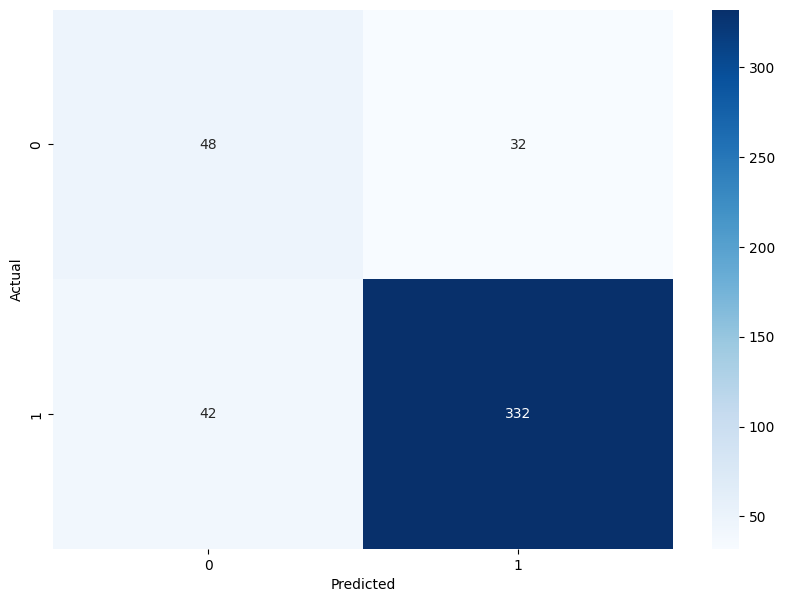

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        80
           1       0.91      0.89      0.90       374

    accuracy                           0.84       454
   macro avg       0.72      0.74      0.73       454
weighted avg       0.85      0.84      0.84       454

Macro F1 Score on Validation set: 0.732217439821457


In [47]:
#Initialize and test the saved model on the validation set, i.e fine tune it
test_model(val_df, model_dir)

## Testing Method Discriminative Code
below is the test code, which takes test.df and predicts the outcome using the model file saved previously.

In [60]:
def test_dis(test_df, model_dir):
    """
    Applies the saved model to an unseen, unlabeled test DataFrame and saves the predictions to a predefined CSV file.

    Args:
        test_df: Unlabeled test dataframe with 'text' column
        model_dir: Model directory where the model and vocabulary are saved
    """

    # Preprocess the test data
    test_df['text'] = test_df['text'].apply(preprocess_text)

    # Check if preprocessed texts are empty
    test_df = test_df[test_df['text'].str.strip() != '']

    if test_df.empty:
        raise ValueError("Test data is empty after preprocessing. Adjust preprocessing steps.")

    # Load the saved model and vocabulary
    try:
        model_file = os.path.join(model_dir, 'model.sav')
        vocab_file = os.path.join(model_dir, 'vocab.sav')

        classifier = pickle.load(open(model_file, 'rb'))
        tfidf_vectorizer = pickle.load(open(vocab_file, 'rb'))
        print('Loaded model and vocabulary from', model_dir)
    except Exception as e:
        raise RuntimeError(f"Error loading model or vocabulary: {e}")

    # Transform the test data using the TF-IDF vectorizer
    test_counts = tfidf_vectorizer.transform(test_df['text'])
    predictions = classifier.predict(test_counts)

    # Save predictions to a predefined CSV file
    output_file = '/content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/output_test.csv'
    results_df = test_df[['text']].copy()
    results_df['output_model_dis'] = predictions
    results_df.to_csv(output_file, index=False)
    print(f"Saved test predictions to {output_file}")

    return


In [61]:
test_dis(test_df,model_dir)

Loaded model and vocabulary from /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis
Saved test predictions to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/output_test.csv


## Discriminative Method  End


# Other Method/model Start

I have trained 2 models, starting with SVM then proceeding to DistilBERT. Both are discriminative models. After assessing the evaluation of the models, I decided to proceed with SVM (above), but also keeping the DistilBert below for information

I ran the model on raw/unprocessed data and it failed to train. So let's pre-proces and modify the code and evaluate.

# **Other Discriminative Model** **DistilBERT**

In [29]:
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define a Dataset class
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = self.data.iloc[index]['text']
        sentiment = self.data.iloc[index]['sentiment_encoded']

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(sentiment, dtype=torch.long)
        }

In [31]:
# Preprocess text data
train_df['text'] = train_df['text'].apply(preprocess_text)
val_df['text'] = val_df['text'].apply(preprocess_text)

# Parameters
PRE_TRAINED_MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 128
BATCH_SIZE = 4
EPOCHS = 2
LEARNING_RATE = 5e-5

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

# Create DataLoader
train_dataset = SentimentDataset(train_df, tokenizer, MAX_LEN)
val_dataset = SentimentDataset(val_df, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialize DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=2)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training function
def train_epoch(model, data_loader, optimizer, device, scheduler):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in tqdm(data_loader, desc="Training"):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        preds = torch.argmax(outputs.logits, dim=1)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/2


Training: 100%|██████████| 920/920 [53:43<00:00,  3.50s/it]


Train loss 0.37096636408393313 accuracy 0.843936922240348


Evaluating: 100%|██████████| 114/114 [01:48<00:00,  1.05it/s]


Val   loss 0.34792301687820437 accuracy 0.8634361233480177
Epoch 2/2


Training: 100%|██████████| 920/920 [53:58<00:00,  3.52s/it]


Train loss 0.21930000881370887 accuracy 0.9148994018488309


Evaluating: 100%|██████████| 114/114 [01:46<00:00,  1.07it/s]


Val   loss 0.3341118608552374 accuracy 0.8612334801762115


Evaluating: 100%|██████████| 114/114 [01:47<00:00,  1.06it/s]


Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.29      0.43        80
    positive       0.87      0.99      0.92       374

    accuracy                           0.86       454
   macro avg       0.84      0.64      0.67       454
weighted avg       0.86      0.86      0.83       454



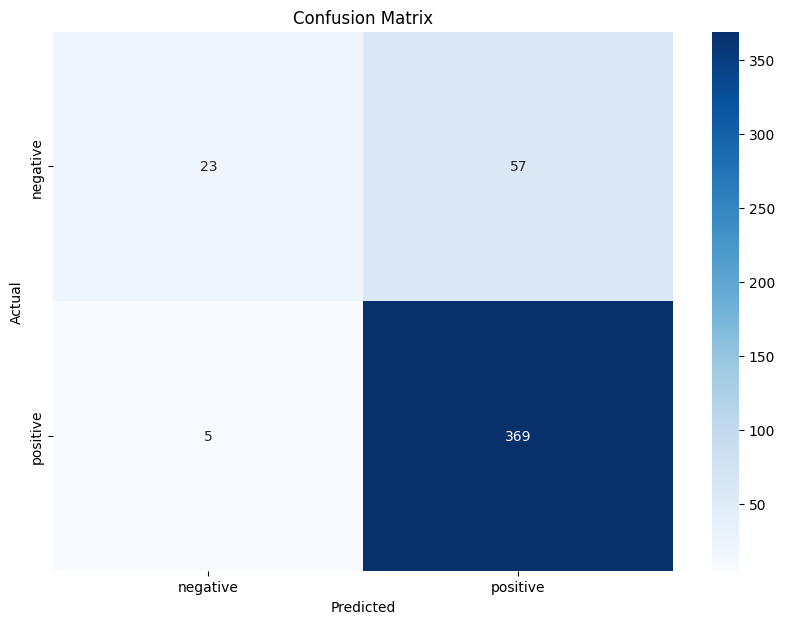

Macro F1 Score on Validation set: 0.674212962962963


In [37]:
# Evaluation function
def eval_model(model, data_loader, device):
    model = model.eval()
    losses = []
    correct_predictions = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for d in tqdm(data_loader, desc="Evaluating"):
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            preds = torch.argmax(outputs.logits, dim=1)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses), all_preds, all_labels

# Training loop
device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')

    train_acc, train_loss = train_epoch(
        model,
        train_loader,
        optimizer,
        device,
        scheduler
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss, preds, labels = eval_model(
        model,
        val_loader,
        device
    )

    print(f'Val   loss {val_loss} accuracy {val_acc}')

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join(model_dir, 'best_model_state.bin'))#save the best model
        tokenizer.save_pretrained(model_dir)  # Save the tokenizer
        best_accuracy = val_acc

# Load best model
model.load_state_dict(torch.load(os.path.join(model_dir, 'best_model_state.bin')))

# Evaluate the best model
val_acc, val_loss, preds, labels = eval_model(model, val_loader, device)

# Classification report
class_names = ['negative', 'positive']
report = classification_report(labels, preds, target_names=class_names)
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Macro F1 Score
score = f1_score(labels, preds, average='macro')
print('Macro F1 Score on Validation set:', score)

##Other Method/model End

================================================================================
# Let's trial out 2 unsupervised models and then choose the best one and move it up into it's own block while keeping the second one here for comparison

# **Unsupervised model -----VADER**

VADER is an unsupervised model which does not require training. We could apply it to trainig set, or validation set and also testing set to get predictions. When applying on validation set, we can keep the target labels for the evaluation purposes.

In [20]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [25]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to convert VADER scores to sentiment labels
def get_sentiment_label(score):
    return 'positive' if score >= 0.3 else 'negative'

# Function to handle numeric values
def handle_numbers(text):
    # Convert standalone numbers that might be ratings
    text = re.sub(r'\b([0-5])\b', lambda m: f"{m.group(1)} stars", text)

    # Keep numbers in context, remove standalone numbers
    text = re.sub(r'\b\d+\b', '', text)

    return text

# Text cleaning and preprocessing function
def vader_preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Handle numbers
    text = handle_numbers(text)

    # Handle special characters (optional, be cautious)
    text = re.sub(r'[^\w\s!?.,]', '', text)

    return text.strip()



# Perform sentiment analysis
vader_sentiments = []

for text in val_df['text']:
    preprocessed_text = vader_preprocess_text(text)
    sentiment_scores = analyzer.polarity_scores(preprocessed_text)
    sentiment_label = get_sentiment_label(sentiment_scores['compound'])
    vader_sentiments.append(sentiment_label)

# Add VADER sentiments to the dataframe
val_df['vader_sentiment'] = vader_sentiments

# Calculate accuracy
accuracy = accuracy_score(val_df['sentiment'], val_df['vader_sentiment'])
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(val_df['sentiment'], val_df['vader_sentiment'], pos_label='positive')
print(f"F1 Score: {f1:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(val_df['sentiment'], val_df['vader_sentiment']))

# Optional: Save results to a new CSV file
#val_df.to_csv('vader_sentiment_results.csv', index=False)

print("\nResults saved to 'sentiment_results.csv'")

Accuracy: 0.81
F1 Score: 0.88

Classification Report:
              precision    recall  f1-score   support

    negative       0.48      0.71      0.57        80
    positive       0.93      0.83      0.88       374

    accuracy                           0.81       454
   macro avg       0.71      0.77      0.73       454
weighted avg       0.85      0.81      0.83       454


Results saved to 'sentiment_results.csv'


In [77]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, f1_score

def test_unsup(train_df):
    # Initialize the VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Function to convert VADER scores to sentiment labels
    def get_sentiment_label(score):
        return 'positive' if score >= 0.3 else 'negative'

    # Function to handle numeric values
    def handle_numbers(text):
        # Convert standalone numbers that might be ratings
        text = re.sub(r'\b([0-5])\b', lambda m: f"{m.group(1)} stars", text)

        # Keep numbers in context, remove standalone numbers
        text = re.sub(r'\b\d+\b', '', text)

        return text

    # Text cleaning and preprocessing function
    def vader_preprocess_text(text):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Handle numbers
        text = handle_numbers(text)

        # Handle special characters (optional, be cautious)
        text = re.sub(r'[^\w\s!?.,]', '', text)

        return text.strip()

    # Perform sentiment analysis
    vader_sentiments = []

    for text in train_df['text']:
        preprocessed_text = vader_preprocess_text(text)
        sentiment_scores = analyzer.polarity_scores(preprocessed_text)
        sentiment_label = get_sentiment_label(sentiment_scores['compound'])
        vader_sentiments.append(sentiment_label)

    # Add VADER sentiments to the dataframe
    train_df['vader_sentiment'] = vader_sentiments

    # Calculate accuracy
    accuracy = accuracy_score(train_df['sentiment'], train_df['vader_sentiment'])
    print(f"Accuracy: {accuracy:.2f}")

    # Calculate F1 score
    f1 = f1_score(train_df['sentiment'], train_df['vader_sentiment'], pos_label='positive')
    print(f"F1 Score: {f1:.2f}")

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(train_df['sentiment'], train_df['vader_sentiment']))

    # Optional: Save results to a new CSV file
    train_df.to_csv('vader_train_sentiment_results.csv', index=False)

    print("\nResults saved to 'vader_train_sentiment_results.csv'")

    return

# Example usage:
# val_df = pd.read_csv('your_file.csv', header=None, names=['label', 'text'])
# test_unsup(val_df)


In [78]:
test_unsup(train_df)

Accuracy: 0.76
F1 Score: 0.85

Classification Report:
              precision    recall  f1-score   support

    negative       0.38      0.57      0.46       650
    positive       0.90      0.80      0.85      3028

    accuracy                           0.76      3678
   macro avg       0.64      0.69      0.65      3678
weighted avg       0.81      0.76      0.78      3678


Results saved to 'vader_train_sentiment_results.csv'


VADER is a model which cannot be pre-trained and needs to be applied to the data sets. I appied VADER to validation data and training data. In both cases, the imbalance of the data with lower negative sentiments results in poor prediction of the negative sentiments. Therefore, I will try K-means clustering next


# **Unsupervised model- K-means clustering**


# **Training Method Unsupervised Code**



In [23]:

import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure you have the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



model_dir=MODEL_Unsup_DIRECTORY

def train_unsup(train_df, val_df, model_dir):
    """
    Takes train_df, val_df and model_dir as input.
    It trained on the train_file datapoints, and validate on the val_file datapoints.
    While training and validating, it print different evaluataion metrics and losses, whererever necessary.
    After finishing the training, it saved the best model in the model_dir.

    ADD Other arguments, if needed.

    Args:
        train_df: Train file name
        val_df: Validation file name
        model_dir: Model output Directory
    """



    print('Training set has', len(train_df),'data points')
    print('Validation set has', len(val_df),'data points')

    # Create vocabulary using count vectorizer
    count_vectorizer = CountVectorizer() # Note no pre-processing is done here. In practice you will have different preprocessing steps.
    counts = count_vectorizer.fit_transform(train_data['text'].values)

    # NB classifier
    classifier = MultinomialNB()
    targets = train_data['label'].values

    #train the classifier
    print('Start training')
    classifier.fit(counts, targets)
    print('Done training')

    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(classifier, open(model_file, 'wb'))
    print('Saved model to', model_file)

    vocab_file = os.path.join(model_dir, 'vocab.sav')
    pickle.dump(count_vectorizer, open(vocab_file, 'wb'))
    print('Saved vocab to', vocab_file)

    # Testing on the validation data
    val_counts=count_vectorizer.transform(val_df['text'])
    predictions= classifier.predict(val_counts)
    print('Validation Done')
    target  = val_df['label']

    score=f1_score(target, predictions, average='macro')

    print('macro F1 Score on Validation set', score)
    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
    return



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
import pandas as pd
import string
import os
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import nltk

# Ensure you have the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



model_dir=MODEL_Unsup_DIRECTORY

def train_unsup(train_df, val_df, model_dir):
    """
    Trains a text classifier using SVM on the provided training DataFrame and validates on the validation DataFrame.
    Saves the best model and vocab in the model_dir.

    Args:
        train_df: DataFrame containing training data with 'text', 'sentiment' and 'encoded_sentiment' columns
        val_df: DataFrame containing validation data with 'text', 'sentiment' and 'encoded_sentiment' columns
        model_dir: Directory to save the trained model and vocabulary
    """

    #encode the sentiments
    train_df['sentiment_encoded'] = train_df['sentiment'].map({'negative': 0, 'positive': 1})
    val_df['sentiment_encoded'] = val_df['sentiment'].map({'negative': 0, 'positive': 1})

    # Remove rows with NaNs in both 'text' and 'label' columns
    train_df = train_df.dropna(subset=['text', 'sentiment'])
    val_df = val_df.dropna(subset=['text', 'sentiment'])

    # Preprocess the data
    train_df['text'] = train_df['text'].apply(preprocess_text)
    val_df['text'] = val_df['text'].apply(preprocess_text)

   # Check if preprocessed texts are empty
    train_df = train_df[train_df['text'].str.strip() != '']
    val_df = val_df[val_df['text'].str.strip() != '']

    if train_df.empty:
        raise ValueError("Training data is empty after preprocessing. Adjust preprocessing steps.")

    if val_df.empty:
        raise ValueError("Validation data is empty after preprocessing. Adjust preprocessing steps.")

    print('Training set has', len(train_df), 'data points')
    print('Validation set has', len(val_df), 'data points')

    # Create vocabulary using TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    counts = tfidf_vectorizer.fit_transform(train_df['text'].values)
    targets = train_df['sentiment_encoded'].values
    print(f"Feature matrix shape: {counts.shape}")
    print(f"Number of targets: {len(targets)}")
    if counts.shape[0] != len(targets):
        raise ValueError(f"Feature matrix has {counts.shape[0]} samples, but target has {len(targets)} samples. Check preprocessing steps.")


    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=student_id)
    counts_resampled, targets_resampled = smote.fit_resample(counts, train_df['sentiment_encoded'].values)

    # Ensure SMOTE output is valid
    print(f"SMOTE feature matrix shape: {counts_resampled.shape}")
    print(f"Number of SMOTE targets: {len(targets_resampled)}")


    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=student_id)
    clusters = kmeans.fit_predict(counts_resampled)

    # Add cluster labels to the dataframe
    train_df['cluster'] = clusters

    # Train the classifier
    print('Start training')
    classifier.fit(counts_resampled, targets_resampled)
    print('Done training')

    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(classifier, open(model_file, 'wb'))
    print('Saved model to', model_file)

    vocab_file = os.path.join(model_dir, 'vocab.sav')
    pickle.dump(tfidf_vectorizer, open(vocab_file, 'wb'))
    print('Saved vocab to', vocab_file)

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.title('K-Means Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()
    # Testing on the validation data
    #val_counts = tfidf_vectorizer.transform(val_df['text'])
    #predictions = classifier.predict(val_counts)
    #print('Validation Done')
    #target = val_df['sentiment_encoded']

    #score = f1_score(target, predictions, average='macro')

    #print('Macro F1 Score on Validation set:', score)

    return


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
train_unsup(train_df, val_df, model_dir)

Training set has 3666 data points
Validation set has 454 data points
Feature matrix shape: (3666, 8257)
Number of targets: 3666
SMOTE feature matrix shape: (6034, 8257)
Number of SMOTE targets: 6034


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Length of values (6034) does not match length of index (3666)

Let's train K-Means clustering model with tfidf vectorizer, SVD for

In [30]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy.stats import mode
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import pickle
from scipy.stats import mode

def train_unsup(train_df, model_dir, n_clusters=2, n_components=1000, n_runs=10):
    """
    Perform unsupervised sentiment analysis using K-means clustering.

    Parameters:
    train_data (pd.DataFrame): Training data with 'text' column
    n_clusters (int): Number of clusters for K-means
    n_components (int): Number of components for dimensionality reduction
    n_runs (int): Number of runs for ensemble clustering

    Returns:
    dict: Dictionary containing model, vectorizer, and clustering results
    """
    studnet_id=2323017

    #apply pre-processing step to the data
    train_df['text'] = train_df['text'].apply(preprocess_text)

    # Feature Extraction
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train = vectorizer.fit_transform(train_df['text'])

    # Dimensionality Reduction
    svd = TruncatedSVD(n_components=n_components, random_state=student_id)
    X_train_reduced = svd.fit_transform(X_train)

    # Sentiment Lexicon Integration
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = np.array([sid.polarity_scores(text)['compound'] for text in train_df['text']])
    X_train_weighted = X_train_reduced * sentiment_scores[:, np.newaxis]

    # Ensemble Clustering
    def ensemble_kmeans(X, n_clusters, n_runs):
        results = []
        for _ in range(n_runs):
            kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=student_id)
            results.append(kmeans.fit_predict(X))
        return mode(results, axis=0).mode[0]

    final_clusters = ensemble_kmeans(X_train_weighted, n_clusters, n_runs)

    # Train final model
    final_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=student_id)
    final_model.fit(X_train_weighted)

    # Analyze cluster centroids
    def get_top_features_cluster(tf_idf_array, prediction, n_feats):
        labels = np.unique(prediction)
        dfs = []
        for label in labels:
            id_temp = np.where(prediction==label)
            x_means = np.mean(tf_idf_array[id_temp], axis = 0)
            sorted_means = np.argsort(x_means)[::-1][:n_feats]
            features = vectorizer.get_feature_names_out()
            best_features = [(features[i], x_means[i]) for i in sorted_means]
            df = pd.DataFrame(best_features, columns = ['features', 'score'])
            dfs.append(df)
        return dfs

    cluster_features = get_top_features_cluster(X_train.toarray(), final_clusters, 10)

    results = {
        'model': final_model,
        'vectorizer': vectorizer,
        'svd': svd,
        'clusters': final_clusters,
        'cluster_features': cluster_features
    }

     # Save model and vectorizer
    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(final_model, open(model_file, 'wb'))
    print('Saved model to', model_file)

    vocab_file = os.path.join(model_dir, 'vocab.sav')
    pickle.dump(vectorizer, open(vocab_file, 'wb'))
    print('Saved vocab to', vocab_file)

    # Save SVD object
    svd_file = os.path.join(model_dir, 'svd.sav')
    pickle.dump(svd, open(svd_file, 'wb'))
    print('Saved SVD to', svd_file)

    return results



In [31]:
train_unsup(train_df=train_df, model_dir=model_dir, n_clusters=2, n_components=1000, n_runs=10)

<ipython-input-30-49af5b8623c9>:62: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  id_temp = np.where(prediction==label)


Saved model to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_unsup/model.sav
Saved vocab to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_unsup/vocab.sav
Saved SVD to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_unsup/svd.sav


{'model': KMeans(n_clusters=2, n_init=10, random_state=2323017),
 'vectorizer': TfidfVectorizer(max_features=1000),
 'svd': TruncatedSVD(n_components=1000, random_state=2323017),
 'clusters': 0,
 'cluster_features': [  features     score
  0     work  0.728290
  1    great  0.685269
  2  youtube  0.000000
  3    frame  0.000000
  4   follow  0.000000
  5     foot  0.000000
  6     ford  0.000000
  7    found  0.000000
  8     four  0.000000
  9     free  0.000000]}

In [32]:
def model_eval(val_df, model_dir):
    """
    Evaluate the model on validation or test data.

    Parameters:
    data (pd.DataFrame): Data with 'text' and 'label' columns
    model_dir (str): Directory where model and vectorizer are saved

    Returns:
    dict: Dictionary containing evaluation metrics and cluster interpretations
    """
    #preroces val_df
    val_df['text'] = val_df['text'].apply(preprocess_text)
    # Load saved model, vectorizer, and SVD
    model_file = os.path.join(model_dir, 'model.sav')
    vocab_file = os.path.join(model_dir, 'vocab.sav')
    svd_file = os.path.join(model_dir, 'svd.sav')

    model = pickle.load(open(model_file, 'rb'))
    vectorizer = pickle.load(open(vocab_file, 'rb'))
    svd = pickle.load(open(svd_file, 'rb'))

    X = vectorizer.transform(val_df['text'])
    X_reduced = svd.transform(X)

    sid = SentimentIntensityAnalyzer()
    sentiment_scores = np.array([sid.polarity_scores(text)['compound'] for text in val_df['text']])
    X_weighted = X_reduced * sentiment_scores[:, np.newaxis]

    predicted_clusters = model.predict(X_weighted)

    true_labels = val_df['sentiment_encoded']
    ari = adjusted_rand_score(true_labels, predicted_clusters)
    ami = adjusted_mutual_info_score(true_labels, predicted_clusters)

    # Interpret Clusters
    cluster_sentiments = []
    for cluster in range(model.n_clusters):
        cluster_docs = val_df[predicted_clusters == cluster]
        sentiment_dist = cluster_docs['sentiment_encoded'].value_counts(normalize=True)
        cluster_sentiments.append(sentiment_dist)

    eval_results = {
        'predicted_clusters': predicted_clusters,
        'ari': ari,
        'ami': ami,
        'cluster_sentiments': cluster_sentiments
    }

    return eval_results



In [33]:
model_eval(val_df, model_dir)

{'predicted_clusters': array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0,